In [1]:
import folium
import requests
import pandas
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Intro

In [47]:
# Map of DC
map_osm = folium.Map(location=[38.9072, -77.0369], zoom_start=11)
map_osm

In [2]:
crime_data = pandas.read_csv("Crime_Incidents_in_2019.csv")
crime_data.head(5)

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.029707,38.939217,19081581,2019/05/12 17:07:34+00,DAY,OTHERS,THEFT F/AUTO,3900 - 3999 BLOCK OF 13TH STREET NW,397424.68,141258.25,...,002502 1,2502.0,Precinct 47,38.939209,-77.029705,NaN,2019/05/12 03:00:54+00,2019/05/12 13:30:03+00,83121287,NaN
1,-77.034603,38.932575,19081589,2019/05/12 16:31:46+00,DAY,OTHERS,THEFT/OTHER,1400 - 1599 BLOCK OF NEWTON STREET NW,396999.96,140521.12,...,002801 1,2801.0,Precinct 41,38.932567,-77.034601,NaN,2019/05/12 15:30:54+00,2019/05/12 16:00:54+00,83121288,NaN
2,-77.085291,38.959920,19081603,2019/05/12 17:18:34+00,DAY,OTHERS,THEFT/OTHER,5300 - 5399 BLOCK OF WISCONSIN AVENUE NW,392607.98,143559.50,...,001100 2,1100.0,Precinct 32,38.959912,-77.085288,NaN,2019/05/12 16:12:47+00,NaN,83121289,NaN
3,-77.026511,38.897356,19081606,2019/05/12 17:39:46+00,DAY,OTHERS,THEFT/OTHER,1000 - 1099 BLOCK OF F STREET NW,397700.46,136611.23,...,005800 1,5800.0,Precinct 129,38.897348,-77.026509,DOWNTOWN,2019/05/12 17:07:36+00,NaN,83121290,NaN
4,-77.028233,38.957823,19081612,2019/05/12 18:26:51+00,DAY,OTHERS,BURGLARY,5600 - 5699 BLOCK OF GEORGIA AVENUE NW,397553.15,143323.63,...,002002 2,2002.0,Precinct 54,38.957815,-77.028231,NaN,2019/05/12 17:06:59+00,2019/05/12 18:00:07+00,83121291,NaN


# To get an idea of what the crime spread looks like
Too many data points to graph plot on a map 

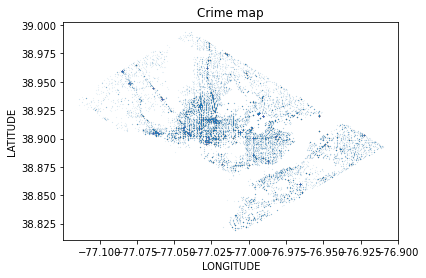

In [22]:
lat = np.array(crime_data.LATITUDE)
long = np.array(crime_data.LONGITUDE)
cords = np.array(crime_data[['LATITUDE','LONGITUDE']])
plt.scatter(long,lat,s=.001)
plt.title("Crime map")
plt.xlabel("LONGITUDE")
plt.ylabel("LATITUDE")
plt.show()

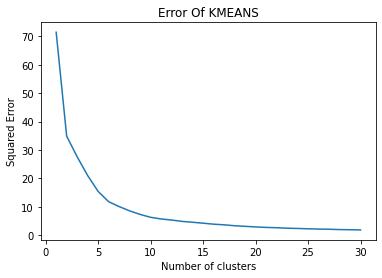

In [24]:
x_limit =30  #the x scale for the graph and the number of times KMEANS is run

inertia=[] #kmeans error
cords = np.array(crime_data[['LATITUDE','LONGITUDE']])
for i in range(1,x_limit+1):
    kmeans = KMeans(i) # ith KMEANS 
    kmeans.fit(cords)      # fit it to the data
    inertia.append(kmeans.inertia_)  # appened the error to the inertia array

number_clusters = [i for i in range(1,x_limit+1)]
plt.plot(number_clusters,inertia)  # Ploting the Error Of KMEANS
plt.title('Error Of KMEANS')
plt.xlabel('Number of clusters')
plt.ylabel('Squared Error');

In [59]:
number_of_clusters = 20
kmeans = KMeans(number_of_clusters) # ith KMEANS 
kmeans.fit(cords)
total_crime = crime_data.shape[0] # Gets number of rows
crime_density = [] # getting the number of crimes per cluster
for i in range(number_of_clusters):
    crime_density.append(list(kmeans.labels_).count(i)/total_crime)

In [63]:
map_osm = folium.Map(location=[38.9072, -77.0369], zoom_start=11)
for i in range(number_of_clusters):
    folium.Circle(
        radius =crime_density[i]*10000,
        location=[kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1]],
        color="red",
    fill=True,
    ).add_to(map_osm)# add circle to the map   
map_osm

38.899786766581975